In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg


In [2]:
#reference system for Magna Sirgas Bogota zone
epsg = 3116

In [3]:
receiver_survey = gpd.GeoDataFrame.from_file('../data_geometry/receiver_POSTPLOT_shapefile/receiver_shapes_tenerife.shp')
source_survey = gpd.GeoDataFrame.from_file('../data_geometry/source_POSTPLOT_shapefile/source_shapes_tenerife.shp')

In [4]:
receiver_survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217,receiver,POINT (1025139.000 1252080.900)
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217,receiver,POINT (1025158.300 1252077.600)
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217,receiver,POINT (1025178.600 1252074.000)
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217,receiver,POINT (1025198.000 1252070.600)
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217,receiver,POINT (1025217.600 1252067.300)
...,...,...,...,...,...,...,...,...
4327,R3252,11781G1,1028791.4,1256555.0,137.2344,90614,receiver,POINT (1028791.400 1256555.000)
4328,R3252,11791G1,1028811.2,1256551.5,135.7344,90614,receiver,POINT (1028811.200 1256551.500)
4329,R3252,11801G1,1028830.8,1256548.0,135.3344,90614,receiver,POINT (1028830.800 1256548.000)
4330,R3252,11811G2,1028830.8,1256548.0,135.3344,104452,receiver,POINT (1028830.800 1256548.000)


In [5]:
source_survey

,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO,ESTE,NORTE,ELEVACION,TYPE,geometry
0,S1054,300010.0,13.0,21,55,1025485.1,1252025.5,80.3333160428,source,POINT (1025485.100 1252025.500)
1,S1095,300010.0,13.0,31,56,1026296.5,1251886.5,105.9333161554,source,POINT (1026296.500 1251886.500)
2,S1216,3000100.0,8.5,9,57,1028671.4,1251467.3,82.5333162006,source,POINT (1028671.400 1251467.300)
3,S1198,3000100.0,7.5,6,58,1028326.9,1251533.7,82.6333162053,source,POINT (1028326.900 1251533.700)
4,S1162,3000100.0,8.5,14,59,1027614.4,1251650.9,81.8333162219,source,POINT (1027614.400 1251650.900)
...,...,...,...,...,...,...,...,...,...,...
3390,S1156,324510.0,13.0,83,600,1028342.9,1256500.8,96.6348114928,source,POINT (1028342.900 1256500.800)
3391,S1094,325110.0,13.0,223,601,1027140.7,1256832.3,127.2348115211,source,POINT (1027140.700 1256832.300)
3392,S1179,325010.0,13.0,133,602,1028810.2,1256524.9,136.7348115257,source,POINT (1028810.200 1256524.900)
3393,S1094,325010.0,13.0,213,603,1027140.7,1256819.0,127.5348115334,source,POINT (1027140.700 1256819.000)


In [5]:
survey = receiver_survey.append(source_survey)

In [6]:
survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217.0,receiver,POINT (1025139.000 1252080.900),NaN,NaN,NaN,NaN,NaN
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217.0,receiver,POINT (1025158.300 1252077.600),NaN,NaN,NaN,NaN,NaN
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217.0,receiver,POINT (1025178.600 1252074.000),NaN,NaN,NaN,NaN,NaN
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217.0,receiver,POINT (1025198.000 1252070.600),NaN,NaN,NaN,NaN,NaN
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217.0,receiver,POINT (1025217.600 1252067.300),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,NaN,NaN,1028342.9,1256500.8,96.6348114928,NaN,source,POINT (1028342.900 1256500.800),S1156,324510.0,13.0,83.0,600.0
3391,NaN,NaN,1027140.7,1256832.3,127.2348115211,NaN,source,POINT (1027140.700 1256832.300),S1094,325110.0,13.0,223.0,601.0
3392,NaN,NaN,1028810.2,1256524.9,136.7348115257,NaN,source,POINT (1028810.200 1256524.900),S1179,325010.0,13.0,133.0,602.0
3393,NaN,NaN,1027140.7,1256819.0,127.5348115334,NaN,source,POINT (1027140.700 1256819.000),S1094,325010.0,13.0,213.0,603.0


Determine survey parameters:

In [12]:
NS = source_survey.shape[0]
NR = receiver_survey.shape[0]
print('Number of Sources =', NS)
print('Number of Receivers = ', NR)

Number of Sources = 3395
Number of Receivers =  4332
(3395,)


In [8]:
#Calculate number of receiver lines and number of receivers on each line
temprec = np.asarray(receiver_survey.RECEIVERSE)
rec_lines, rec_per_line = np.unique(temprec, return_counts=True)
NRL = rec_lines.size # Number of receiver lines
print('Receiver lines: ', rec_lines)
print('Receivers on each line: ', rec_per_line) #number of receivers per line
print('Number of receiver lines: ', NRL)

Receiver lines:  ['R3000' 'R3014' 'R3028' 'R3042' 'R3056' 'R3070' 'R3084' 'R3098' 'R3112'
 'R3126' 'R3140' 'R3154' 'R3168' 'R3182' 'R3196' 'R3210' 'R3224' 'R3238'
 'R3252']
Receivers on each line:  [198 198 198 198 234 252 252 252 252 243 234 235 234 234 234 234 234 234
 182]
Number of receiver lines:  19


In [9]:
#Calculate number of source lines and number of sources on each line
tempsrc = np.asarray(source_survey.SHOTSEQ)
src_lines, src_per_line = np.unique(tempsrc, return_counts=True)
NSL = src_lines.size # Number of source lines
print('Source lines: ', src_lines)
print('Sources on each line: ', src_per_line)#number of sources per line
print('Number of source lines: ', NSL)

Source lines:  ['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1014' 'S1015'
 'S1016' 'S1017' 'S1018' 'S1019' 'S1020' 'S1021' 'S1023' 'S1027' 'S1029'
 'S1030' 'S1031' 'S1032' 'S1034' 'S1036' 'S1037' 'S1038' 'S1040' 'S1041'
 'S1042' 'S1043' 'S1044' 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050'
 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056' 'S1058' 'S1059' 'S1061'
 'S1062' 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070'
 'S1071' 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079'
 'S1080' 'S1081' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090'
 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098' 'S1099'
 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107' 'S1108'
 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1117' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131' 'S1132' 'S1133' 'S1134' 'S1135' 'S1136'
 'S1137' 'S1138' 'S1139' 'S1140' 'S1

In [14]:
#Calculate distance among sources
copy1_sourcegeometry = source_survey.geometry[1:] #From second to last entry
copy2_sourcegeometry = source_survey.geometry[:-1]  #From first to penultimate

distances = copy2_sourcegeometry.distance(copy1_sourcegeometry, align=False)


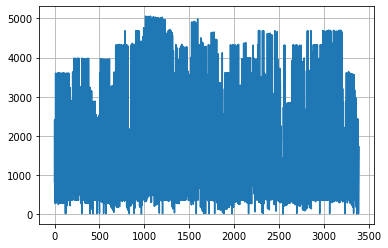

In [16]:
distances.plot()
plt.grid()
plt.show()

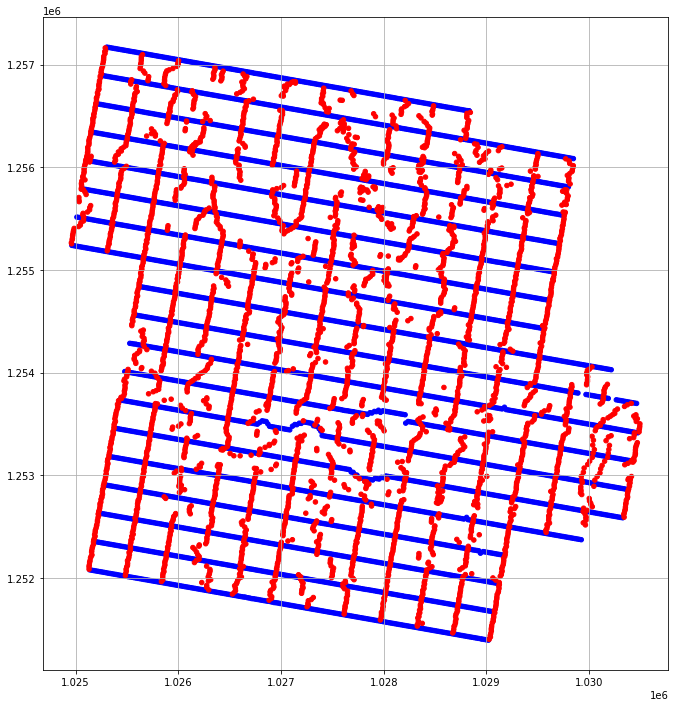

In [10]:
survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
plt.grid()
plt.show()

In [9]:
s2 = survey.rotate(10, origin=survey.unary_union.centroid)
s2

0       POINT (1025551.179 1251698.612)
1       POINT (1025570.759 1251698.713)
2       POINT (1025591.376 1251698.693)
3       POINT (1025611.072 1251698.713)
4       POINT (1025630.947 1251698.867)
                     ...               
3390    POINT (1027938.897 1256607.715)
3391    POINT (1026697.397 1256725.419)
3392    POINT (1028394.913 1256712.594)
3393    POINT (1026699.707 1256712.321)
3394    POINT (1028426.046 1256727.223)
Length: 7727, dtype: geometry

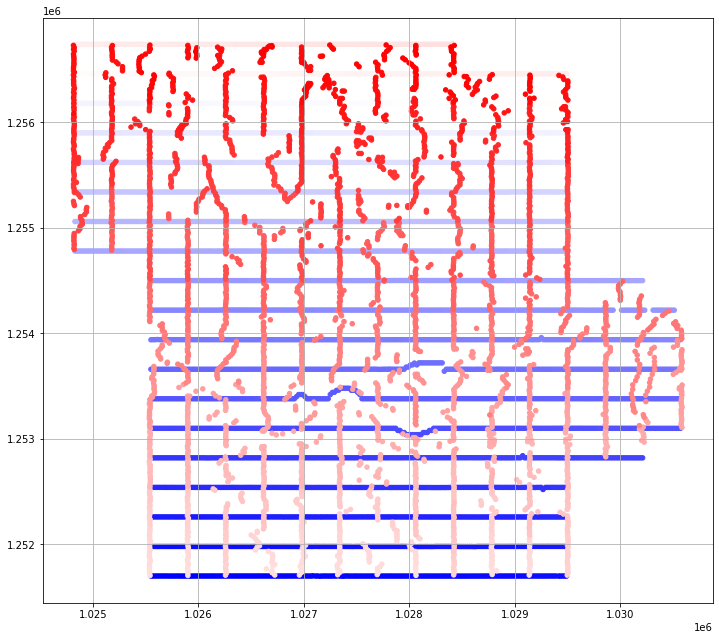

In [10]:
s2.plot(figsize=(12,12), cmap="bwr", markersize=20)
plt.grid()
plt.show()